In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import pickle
%matplotlib inline

In [2]:
def view_imgs(imgs, cols=4):
    """ this function to show a list of imgs using subplot """
    rows = np.ceil(len(imgs)/cols)
    width = imgs[0].shape[1]
    height = imgs[0].shape[0]
    figsize = width/70, height/60
    plt.figure(figsize= figsize)
    for i, img in enumerate(imgs):
        camp = 'gray' if len(img.shape) < 3 else None
        plt.subplot(rows, cols, i+1)
        plt.imshow(img,cmap=camp)
    plt.tight_layout(pad=0, h_pad=0, w_pad=0)
    plt.show()

In [3]:
test_undist_n = glob.glob('output_images/test_undist/*.jpg')

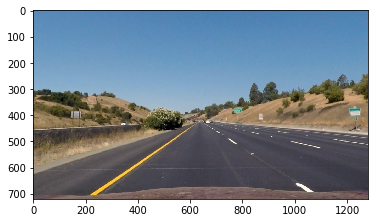

In [4]:
test_undist = [mpimg.imread(img_name) for img_name in test_undist_n]
plt.imshow(test_undist[0])

In [52]:
shape = test_undist[0].shape
y2 = 475
y1 = 700
src = np.float32([(240, y1), (559, y2), (725, y2), (1072, y1)]) 

In [53]:
# %matplotlib qt

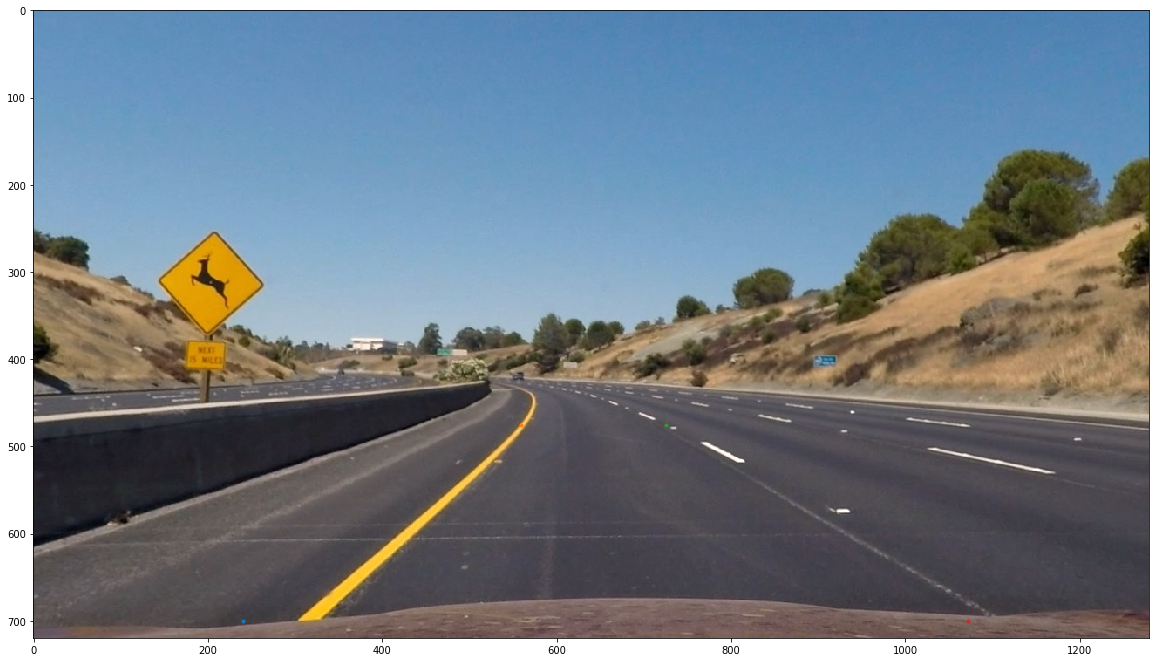

In [92]:
plt.figure(figsize= (20,20))
plt.imshow(test_undist[3])
plt.plot(src[0][0],src[0][1],'.')
plt.plot(src[1][0],src[1][1],'.')
plt.plot(src[2][0],src[2][1],'.')
plt.plot(src[3][0],src[3][1],'.')
plt.show()

In [83]:
marginx1 = src[0][0] + 125
marginx2 = src[3][0] - 125
pady = 400
dst = np.float32([(marginx1, shape[0]), (marginx1, pady), (marginx2, pady), (marginx2, shape[0])])

In [84]:
M = cv2.getPerspectiveTransform(src, dst)
INV_M = cv2.getPerspectiveTransform(dst, src)

In [90]:
warped = cv2.warpPerspective(test_undist[3], M, test_undist[0].shape[1::-1], flags=cv2.INTER_LINEAR)

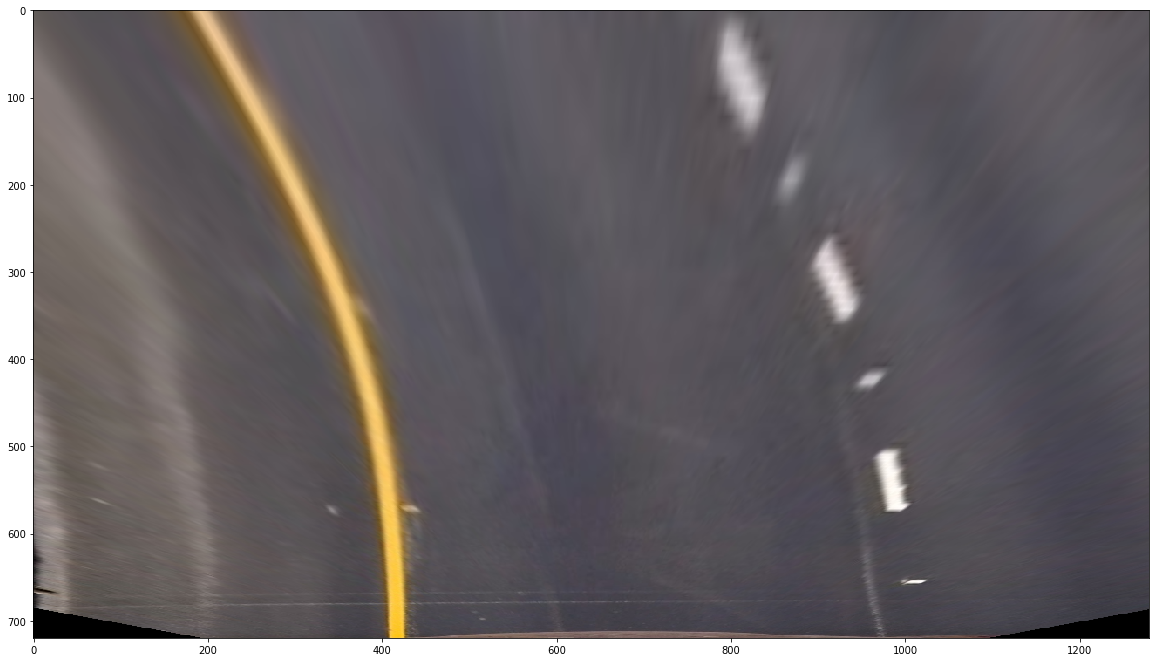

In [91]:
plt.figure(figsize= (20,20))
plt.imshow(warped)
plt.show()

In [87]:
w = cv2.warpPerspective(warped, INV_M, test_undist[0].shape[1::-1], flags=cv2.INTER_LINEAR)

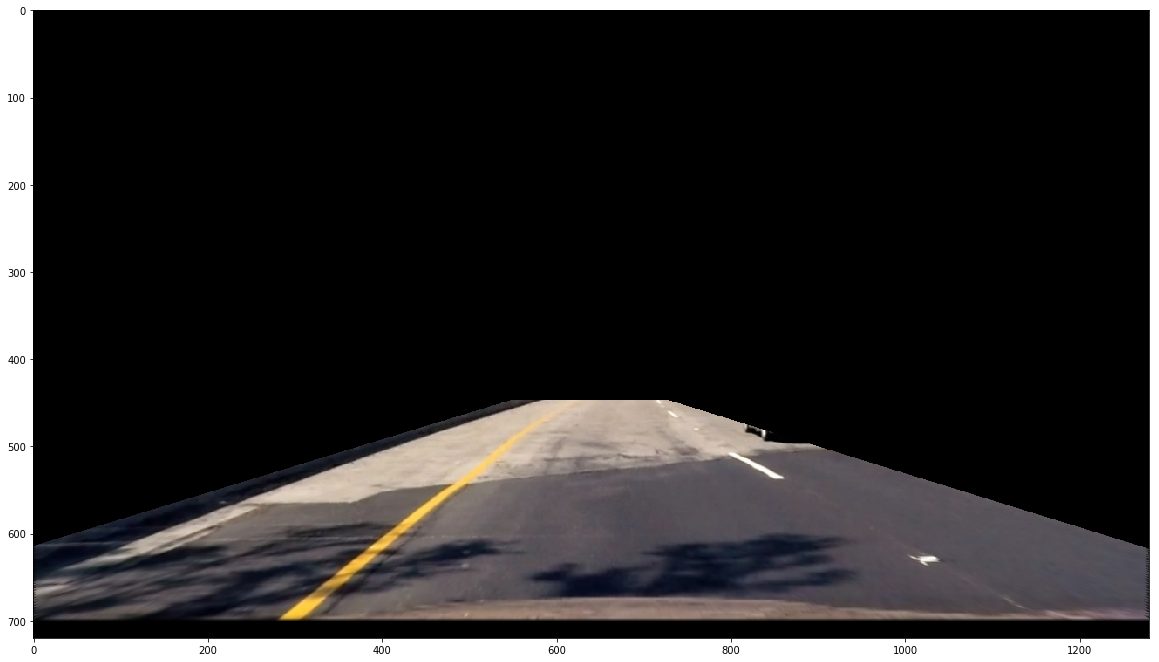

In [88]:
plt.figure(figsize= (20,20))
plt.imshow(w)
plt.show()

In [89]:
warp_pickle = {}
warp_pickle["M"] = M
warp_pickle["INV_M"] = INV_M
pickle.dump( warp_pickle, open( "warp_pickle.p", "wb" ) )